### Package call

In [ ]:
!pip install matplotlib

In [1]:
import psycopg2
import pandas as pd
import psycopg2.extras
import matplotlib.pyplot as plt

***Connect to the database***

In [2]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "Nabila12345@",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("successfully connected to database"),
        return self.connection

In [3]:
con = PostgresConnection().getConnection()

successfully connected to database


## Some simple CUBE query including ROLL UP, DRILL DOWN, SLICE, DICE to answer the following questions from the ecomdb warehouse

### Q1: Find the division/district/year/month wise total_sale_price joining fact table and respective dimension table 

#### Cube

In [4]:
cur = con.cursor()
select_stmt = " SELECT s.district, tim.year, SUM(f.total_price) " \
              " From ecomdb_star_schema.fact_table f " \
              " JOIN ecomdb_star_schema.store_dim s on s.store_key=f.store_key " \
              " JOIN ecomdb_star_schema.time_dim tim on tim.time_key=f.time_key "\
              " GROUP BY CUBE (s.district,tim.year) "\
              " ORDER BY s.district"
cur.execute(select_stmt)
records = cur.fetchall()
records

[('BAGERHAT', None, Decimal('1307651.00')),
 ('BAGERHAT', 2021, Decimal('9418.50')),
 ('BAGERHAT', 2020, Decimal('199102.25')),
 ('BAGERHAT', 2016, Decimal('180810.00')),
 ('BAGERHAT', 2014, Decimal('169968.00')),
 ('BAGERHAT', 2015, Decimal('180761.75')),
 ('BAGERHAT', 2018, Decimal('184449.25')),
 ('BAGERHAT', 2019, Decimal('192573.25')),
 ('BAGERHAT', 2017, Decimal('190568.00')),
 ('BANDARBAN', 2015, Decimal('144484.75')),
 ('BANDARBAN', None, Decimal('995360.75')),
 ('BANDARBAN', 2021, Decimal('9725.25')),
 ('BANDARBAN', 2020, Decimal('135162.75')),
 ('BANDARBAN', 2016, Decimal('135192.00')),
 ('BANDARBAN', 2019, Decimal('142752.25')),
 ('BANDARBAN', 2014, Decimal('140629.50')),
 ('BANDARBAN', 2018, Decimal('141819.00')),
 ('BANDARBAN', 2017, Decimal('145595.25')),
 ('BARGUNA', 2015, Decimal('119764.50')),
 ('BARGUNA', 2014, Decimal('115381.00')),
 ('BARGUNA', 2018, Decimal('132766.75')),
 ('BARGUNA', None, Decimal('869041.00')),
 ('BARGUNA', 2016, Decimal('120026.00')),
 ('BARGUNA

In [14]:
df = pd.DataFrame(list(records), columns=['district', 'year', 'total_price'])
df.head(10)

,district,year,total_price
0,BAGERHAT,NaN,1307651.00
1,BAGERHAT,2021.0,9418.50
2,BAGERHAT,2020.0,199102.25
3,BAGERHAT,2016.0,180810.00
4,BAGERHAT,2014.0,169968.00
5,BAGERHAT,2015.0,180761.75
6,BAGERHAT,2018.0,184449.25
7,BAGERHAT,2019.0,192573.25
8,BAGERHAT,2017.0,190568.00
9,BANDARBAN,2015.0,144484.75


#### ROLLUP

In [21]:
cur = con.cursor()
select_stmt = " SELECT s.division, tim.month, SUM(f.total_price) " \
              " From ecomdb_star_schema.fact_table f " \
              " JOIN ecomdb_star_schema.store_dim s on s.store_key=f.store_key " \
              " JOIN ecomdb_star_schema.time_dim tim on tim.time_key=f.time_key "\
              " GROUP BY ROLLUP (s.division,tim.month) "\
              " ORDER BY s.division"
cur.execute(select_stmt)
records = cur.fetchall()
records

[('BARISAL', 1, Decimal('643505.00')),
 ('BARISAL', 4, Decimal('612193.00')),
 ('BARISAL', 7, Decimal('655357.75')),
 ('BARISAL', 12, Decimal('638101.00')),
 ('BARISAL', 3, Decimal('637664.75')),
 ('BARISAL', 5, Decimal('640123.00')),
 ('BARISAL', 8, Decimal('631881.50')),
 ('BARISAL', 9, Decimal('619753.75')),
 ('BARISAL', 11, Decimal('626030.50')),
 ('BARISAL', 10, Decimal('620955.00')),
 ('BARISAL', None, Decimal('7520343.75')),
 ('BARISAL', 2, Decimal('582863.00')),
 ('BARISAL', 6, Decimal('611915.50')),
 ('CHITTAGONG', None, Decimal('19763595.00')),
 ('CHITTAGONG', 7, Decimal('1712954.25')),
 ('CHITTAGONG', 12, Decimal('1665138.00')),
 ('CHITTAGONG', 9, Decimal('1627565.25')),
 ('CHITTAGONG', 1, Decimal('1714833.25')),
 ('CHITTAGONG', 6, Decimal('1589532.50')),
 ('CHITTAGONG', 8, Decimal('1667686.75')),
 ('CHITTAGONG', 2, Decimal('1505376.50')),
 ('CHITTAGONG', 11, Decimal('1640113.75')),
 ('CHITTAGONG', 4, Decimal('1584083.00')),
 ('CHITTAGONG', 3, Decimal('1684031.00')),
 ('CHIT

In [22]:
df1 = pd.DataFrame(list(records), columns=['division', 'month', 'total_price'])
df1.head(10)

,division,month,total_price
0,BARISAL,1.0,643505.00
1,BARISAL,4.0,612193.00
2,BARISAL,7.0,655357.75
3,BARISAL,12.0,638101.00
4,BARISAL,3.0,637664.75
5,BARISAL,5.0,640123.00
6,BARISAL,8.0,631881.50
7,BARISAL,9.0,619753.75
8,BARISAL,11.0,626030.50
9,BARISAL,10.0,620955.00


#### Slice

In [23]:
cur = con.cursor()
select_stmt = " SELECT s.division,SUM(f.total_price)" \
              " From ecomdb_star_schema.fact_table f " \
              " JOIN ecomdb_star_schema.store_dim s on s.store_key=f.store_key " \
              " Where s.division ='BARISAL' " \
              " GROUP BY s.division"
cur.execute(select_stmt)
records = cur.fetchall()
records

[('BARISAL', Decimal('7520343.75'))]

In [24]:
df3 = pd.DataFrame(list(records), columns=['division', 'total_price'])
df3

,division,total_price
0,BARISAL,7520343.75


#### Before Dicing

In [25]:
cur = con.cursor()
select_stmt = " SELECT i.item_name,SUM(f.total_price)" \
              " From ecomdb_star_schema.fact_table f " \
              " JOIN ecomdb_star_schema.store_dim s on s.store_key=f.store_key " \
              "JOIN ecomdb_star_schema.item_dim i on i.item_key=f.item_key" \
              " Where i.item_name ='Cherry Coke 12oz' " \
              " GROUP BY i.item_name "
cur.execute(select_stmt)
records = cur.fetchall()
records

[('Cherry Coke 12oz', Decimal('153765.00'))]

In [26]:
df4 = pd.DataFrame(list(records), columns=['item_name', 'total_price'])
df4

,item_name,total_price
0,Cherry Coke 12oz,153765.00


#### After Dicing

In [27]:
cur = con.cursor()
select_stmt = " SELECT i.item_name,SUM(f.total_price)" \
              " From ecomdb_star_schema.fact_table f " \
              " JOIN ecomdb_star_schema.store_dim s on s.store_key=f.store_key " \
              "JOIN ecomdb_star_schema.item_dim i on i.item_key=f.item_key" \
              " Where i.item_name ='Cherry Coke 12oz' and s.division='BARISAL'" \
              " GROUP BY i.item_name "
cur.execute(select_stmt)
records = cur.fetchall()
records

[('Cherry Coke 12oz', Decimal('10766.25'))]

In [28]:
df5 = pd.DataFrame(list(records), columns=['item_name', 'total_price'])
df5

,item_name,total_price
0,Cherry Coke 12oz,10766.25


### Q2: Find the customer/bank/transaction(cash/online) wise total_sale_price joining fact table and respective dimension table 

In [29]:
cur = con.cursor()
select_stmt = " SELECT c.name, tr.bank_name, SUM(f.total_price) " \
              " From ecomdb_star_schema.fact_table f " \
              " JOIN ecomdb_star_schema.coustomer_dim c on c.coustomer_key=f.coustomer_key " \
              " JOIN ecomdb_star_schema.trans_dim tr on tr.payment_key=f.payment_key "\
              " GROUP BY CUBE (c.name,tr.bank_name) "\
              " ORDER BY tr.bank_name"
cur.execute(select_stmt)
records = cur.fetchall()
records

[('anuradha @ anu', 'AB Bank Limited', Decimal('236.0')),
 ('bharti pasi', 'AB Bank Limited', Decimal('237.0')),
 ('bharti singh @ sona', 'AB Bank Limited', Decimal('635.5')),
 ('ankita kanwar rathore', 'AB Bank Limited', Decimal('200.0')),
 ('bina bai', 'AB Bank Limited', Decimal('670.0')),
 ('divya sharma d/o om prakash sharma', 'AB Bank Limited', Decimal('32.0')),
 ('aktri aapa', 'AB Bank Limited', Decimal('222.5')),
 ('durga pathik', 'AB Bank Limited', Decimal('148.0')),
 ('bhatari', 'AB Bank Limited', Decimal('407.5')),
 ('aishwarya', 'AB Bank Limited', Decimal('253.75')),
 ('akshay kumar', 'AB Bank Limited', Decimal('498.5')),
 ('bhateri @ bhawna', 'AB Bank Limited', Decimal('96.0')),
 ('gurmel kour', 'AB Bank Limited', Decimal('119.0')),
 ('bina', 'AB Bank Limited', Decimal('49.0')),
 ('durga kumari', 'AB Bank Limited', Decimal('823.0')),
 ('bhatri', 'AB Bank Limited', Decimal('74.0')),
 ('gytri  garg', 'AB Bank Limited', Decimal('256.0')),
 ('bimlesh', 'AB Bank Limited', Decima

In [30]:
df6 = pd.DataFrame(list(records), columns=['Coustomer_name','Bank_name', 'total_price'])
df6.head(10)

,Coustomer_name,Bank_name,total_price
0,anuradha @ anu,AB Bank Limited,236.0
1,bharti pasi,AB Bank Limited,237.0
2,bharti singh @ sona,AB Bank Limited,635.5
3,ankita kanwar rathore,AB Bank Limited,200.0
4,bina bai,AB Bank Limited,670.0
5,divya sharma d/o om prakash sharma,AB Bank Limited,32.0
6,aktri aapa,AB Bank Limited,222.5
7,durga pathik,AB Bank Limited,148.0
8,bhatari,AB Bank Limited,407.5
9,aishwarya,AB Bank Limited,253.75


In [5]:
cur = con.cursor()
select_stmt = " SELECT c.name, i.item_name ,tr.bank_name , SUM(f.total_price) " \
              " From ecomdb_star_schema.fact_table f " \
              " JOIN ecomdb_star_schema.coustomer_dim c on c.coustomer_key=f.coustomer_key " \
              " JOIN ecomdb_star_schema.trans_dim tr on tr.payment_key=f.payment_key "\
              "JOIN ecomdb_star_schema.item_dim i on i.item_key=f.item_key " \
              " GROUP BY CUBE (c.name,i.item_name, tr.bank_name) "\
              " ORDER BY i.item_name"
cur.execute(select_stmt)
records = cur.fetchall()
records

[('smt devli',
  '100% Juice Box Variety 6.75 oz ',
  'Padma Bank Limited',
  Decimal('30.0')),
 ('smt radha devi', '100% Juice Box Variety 6.75 oz ', None, Decimal('30.0')),
 ('smt radha devi',
  '100% Juice Box Variety 6.75 oz ',
  'United Commercial Bank Ltd',
  Decimal('30.0')),
 ('smt neelam', '100% Juice Box Variety 6.75 oz ', None, Decimal('225.0')),
 ('smt neelam',
  '100% Juice Box Variety 6.75 oz ',
  'Mutual Trust Bank Limited',
  Decimal('150.0')),
 ('smt niru', '100% Juice Box Variety 6.75 oz ', None, Decimal('120.0')),
 ('smt niru',
  '100% Juice Box Variety 6.75 oz ',
  'Jamuna Bank Limited',
  Decimal('120.0')),
 ('smt devli', '100% Juice Box Variety 6.75 oz ', None, Decimal('30.0')),
 ('smt lata',
  '100% Juice Box Variety 6.75 oz ',
  'Community Bank Bangladesh Limited',
  Decimal('135.0')),
 ('smt lata', '100% Juice Box Variety 6.75 oz ', None, Decimal('135.0')),
 ('smt neelam',
  '100% Juice Box Variety 6.75 oz ',
  'Midland Bank Limited',
  Decimal('75.0')),
 ('smt

In [6]:
df7 = pd.DataFrame(list(records), columns=['Coustomer_name','Item_name','Bank_name', 'total_price'])
df7.head(10)

,Coustomer_name,Item_name,Bank_name,total_price
0,smt devli,100% Juice Box Variety 6.75 oz,Padma Bank Limited,30.0
1,smt radha devi,100% Juice Box Variety 6.75 oz,None,30.0
2,smt radha devi,100% Juice Box Variety 6.75 oz,United Commercial Bank Ltd,30.0
3,smt neelam,100% Juice Box Variety 6.75 oz,None,225.0
4,smt neelam,100% Juice Box Variety 6.75 oz,Mutual Trust Bank Limited,150.0
5,smt niru,100% Juice Box Variety 6.75 oz,None,120.0
6,smt niru,100% Juice Box Variety 6.75 oz,Jamuna Bank Limited,120.0
7,smt devli,100% Juice Box Variety 6.75 oz,None,30.0
8,smt lata,100% Juice Box Variety 6.75 oz,Community Bank Bangladesh Limited,135.0
9,smt lata,100% Juice Box Variety 6.75 oz,None,135.0


### Q3: Total sales in Barisal

In [7]:
cur = con.cursor()
select_stmt = "SELECT s.district, SUM(f.total_price)" \
        "FROM ecomdb_star_schema.fact_table f " \
        "JOIN ecomdb_star_schema.store_dim s on s.store_key = f.store_key " \
        "WHERE s.district = 'BARISAL' " \
        "GROUP BY CUBE (s.district)"
cur.execute(select_stmt)
records = cur.fetchall()
records

[('BARISAL', Decimal('2897237.75')), (None, Decimal('2897237.75'))]

In [8]:
df10 = pd.DataFrame(list(records), columns=['division', 'total_price'])
df10

,division,total_price
0,BARISAL,2897237.75
1,None,2897237.75


### Q4: Total sales in 2015

In [13]:
cur = con.cursor()
select_stmt = "SELECT t.year, SUM(f.total_price)" \
        "FROM ecomdb_star_schema.fact_table f " \
        "JOIN ecomdb_star_schema.time_dim t on t.time_key = f.time_key " \
        "WHERE t.year = '2015' " \
        "GROUP BY t.year"
cur.execute(select_stmt)
records = cur.fetchall()
records

[(2015, Decimal('15095720.25'))]

In [14]:
df11 = pd.DataFrame(list(records), columns=['Year', 'total_price'])
df11

,Year,total_price
0,2015,15095720.25


### Q5: Total sales of Barisal in 2015

In [16]:
cur = con.cursor()
select_stmt = " SELECT t.year,s.division,SUM(f.total_price)" \
              " From ecomdb_star_schema.fact_table f " \
              " JOIN ecomdb_star_schema.store_dim s on s.store_key=f.store_key " \
              "JOIN ecomdb_star_schema.time_dim t on t.time_key=f.time_key" \
              " Where t.year ='2015' and s.division='BARISAL'" \
              " GROUP BY CUBE(t.year,s.division) "
cur.execute(select_stmt)
records = cur.fetchall()
records

[(2015, 'BARISAL', Decimal('1076902.75')),
 (2015, None, Decimal('1076902.75')),
 (None, None, Decimal('1076902.75')),
 (None, 'BARISAL', Decimal('1076902.75'))]

In [17]:
df12 = pd.DataFrame(list(records), columns=['Year', 'Division' ,'total_price'])
df12

,Year,Division,total_price
0,2015.0,BARISAL,1076902.75
1,2015.0,None,1076902.75
2,NaN,None,1076902.75
3,NaN,BARISAL,1076902.75


## Some complex CUBE query including ROLL UP, DRILL DOWN, SLICE, DICE to answer the following questions from the ecomdb warehouse

### Q6: For each store(item supplier), what are the top three products offered that are most often purchased?

In [6]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = " SELECT s.store_key,i.item_name,SUM(f.quantity)" \
              " From ecomdb_star_schema.fact_table f " \
              " JOIN ecomdb_star_schema.store_dim s on s.store_key=f.store_key " \
              "JOIN ecomdb_star_schema.item_dim i on i.item_key=f.item_key" \
              " GROUP BY CUBE(s.store_key,i.item_name) "
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('S0001', '100% Juice Box Variety 6.75 oz ', 10),
 ('S0001', 'A&W Root Beer - 12 oz cans', 60),
 ('S0001', 'A&W Root Beer Diet - 12 oz cans', 8),
 ('S0001', 'Advil 2 pill packets', 28),
 ('S0001', 'All Purpose Cleaner 409 Spray', 46),
 ('S0001', 'Altoids Small Packs Variety', 13),
 ('S0001', 'Apple Sauce Variety GoGO Squeeze 3.2oz', 37),
 ('S0001', 'AquaFina Purified Drinking Water 16oz', 39),
 ('S0001', 'Austin Cookie Cracker Variety', 10),
 ('S0001', 'Austin Toasty Crackers w/ PBtr', 22),
 ('S0001', 'Baked Chips Variety Mix Frito', 50),
 ('S0001', "Barq's Root Beer - 12 oz cans", 43),
 ('S0001', 'Belvita Hard Biscuits Blueberry', 11),
 ('S0001', 'Belvita Hard Biscuits Cinnamon', 24),
 ('S0001', 'Belvita Protein Oats Soft Biscuit', 50),
 ('S0001', 'Blue Diamond Almonds Rstd, Sltd', 13),
 ('S0001', 'Bounty Paper Towels Select a Size ', 16),
 ('S0001', 'Breath Savers Peppermints 12/roll ', 28),
 ('S0001', 'Brisk Lemon Iced Tea - 12 oz cans', 30),
 ('S0001', 'Cascade Gel Packs Dishwashe

In [7]:
df13 = pd.DataFrame(list(records), columns=['Store_key', 'Item_name' ,'Quantity'])
df13.head(10)

,Store_key,Item_name,Quantity
0,S0001,100% Juice Box Variety 6.75 oz,10
1,S0001,A&W Root Beer - 12 oz cans,60
2,S0001,A&W Root Beer Diet - 12 oz cans,8
3,S0001,Advil 2 pill packets,28
4,S0001,All Purpose Cleaner 409 Spray,46
5,S0001,Altoids Small Packs Variety,13
6,S0001,Apple Sauce Variety GoGO Squeeze 3.2oz,37
7,S0001,AquaFina Purified Drinking Water 16oz,39
8,S0001,Austin Cookie Cracker Variety,10
9,S0001,Austin Toasty Crackers w/ PBtr,22


## Histogram

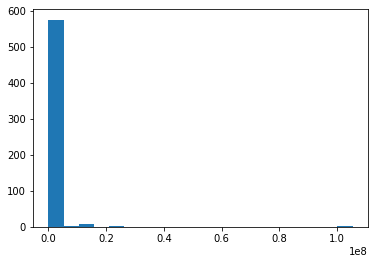

In [6]:
plt.hist(df['total_price'],bins=20)
plt.show()

## LinePlot

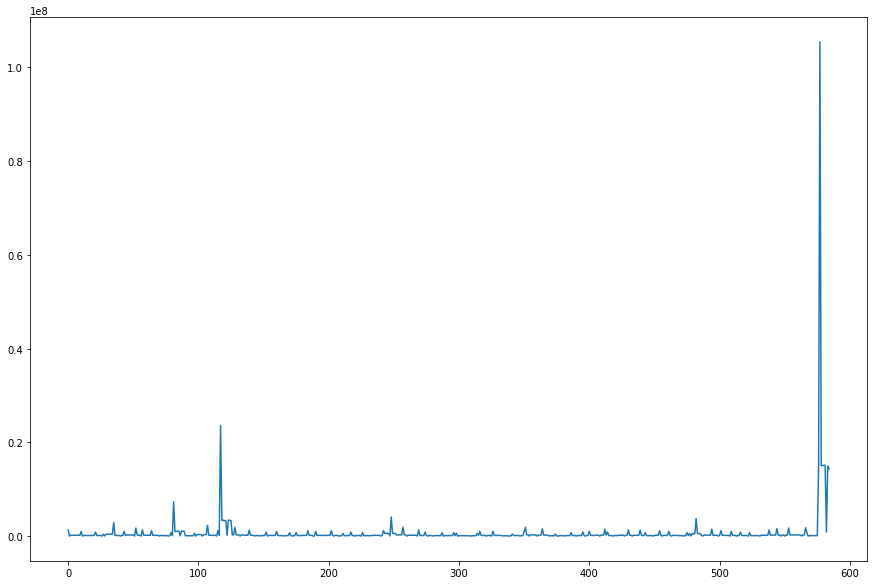

In [7]:
#a=df['year'
b=df['total_price']
plt.figure(figsize=(15,10))
#plt.plot(a)
plt.plot(b)
plt.show()

In [8]:
df['total_price']=df['total_price'].astype('float64')

In [9]:
df.dtypes

district        object
year           float64
total_price    float64
dtype: object

## Bar Chart

In [10]:
df['year']=df['year'].astype('float64')

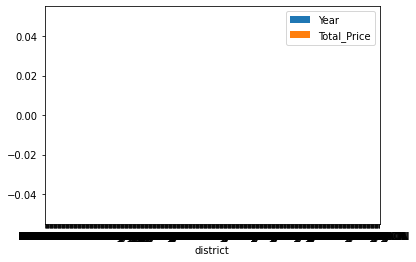

In [10]:
Year= df['year']
price = df['total_price']
District = df['district']
df = pd.DataFrame({'Year': Year,
                   'Total_Price': price}, index=District)
ax = df.plot.bar(rot=0)

In [ ]:
axes = df.plot.bar(rot=0, subplots=True)
axes[1].legend(loc=2)  

## Pie Chart

In [15]:
df['total_price']=df['total_price'].astype('float64')

In [18]:
df_pie= df.set_index(['district'])

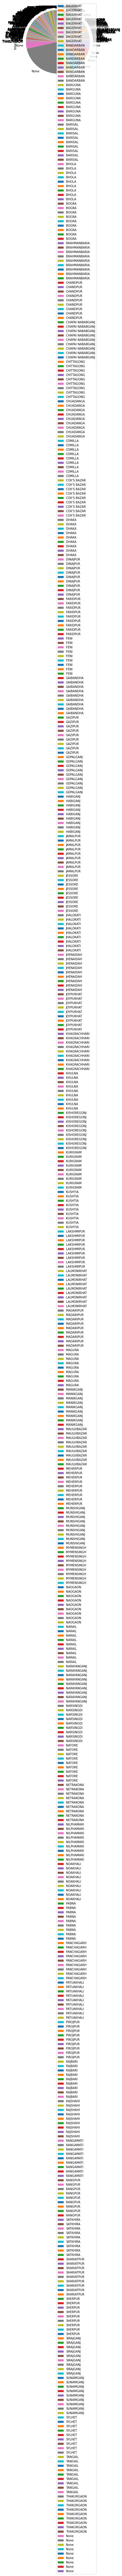

In [20]:
plot = df_pie.plot.pie(y='total_price', figsize=(5, 5))